In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline 
# sets backend of matpotlin to thr inline backend i.e., to show the output directly below the code.

In [26]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\playstore-analysis (2) (1).csv')

In [27]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
data.info()
#to show the total number of non-null rows and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [29]:
data.isnull().sum()
#to show the number of null rows present

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Task 1 Data Clean Up-Missing value treatment

a.	Drop records where rating is missing since rating is our target/study variable

In [30]:
data.dropna(how='any', subset=['Rating'], axis=0, inplace = True)
#when inplace = true the target data based on the condition will be dropped permenantly

In [31]:
data.Rating.isnull().sum()

0

b.	Check the null values for the Android Ver column. 

i.	Are all 3 records having the same problem?

In [32]:
data.loc[data['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


ii.	Drop the 3rd record i.e. record for “Life Made WIFI …”

In [33]:
data.drop([10472], inplace = True)
#when inplace = true the target data based on the condition will be dropped permenantly

In [34]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


iii.	Replace remaining missing values with the mode

In [35]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)
#mode is used in such a way it fills the missing dat with the most frequent values

c. Current ver – replace with most common value

In [36]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)

# Task: 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

b. Price variable – remove $ sign and convert to float

In [37]:
#to remove $ sign
price = []
for i in data['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i) 

In [38]:
# convert to float
data.drop(labels=data[data['Price']=='Everyone'].index, inplace = True)
data['Price']= price
data['Price']= data['Price'].astype('float')

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [39]:
install = [] #array declaration
for j in data['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

data['Installs']= install
data['Installs']= data['Installs'].astype('int') #typecasting


d. Convert all other identified columns to numeric

In [40]:
data['Reviews']=data['Reviews'].astype('int')

# Task 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store

i. Are there any such records? Drop if so

In [41]:
data.loc[data.Rating < 1] & data.loc[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


b. Reviews should not be more than installs as only those who installed can review the app.

i. Are there any such records? Drop if so.

In [42]:
data.loc[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [48]:
records_7 = data[data['Reviews']>data['Installs']].index
data.drop(labels=records_7, inplace=True)
#when inplace = true the target data based on the condition will be dropped permenantly

In [49]:
data.loc[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Task 4. Identify and handle outliers

a. Price column

i. Make suitable plot to identify outliers in price

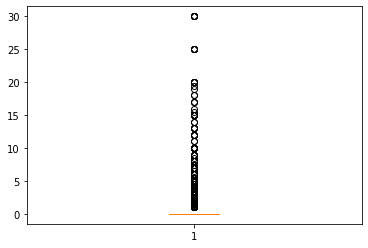

In [50]:
plt.boxplot(data['Price'])
plt.show()

ii.Do you expect apps on the play store to cost $200? Check out these cases

In [51]:
print('Yes we do expect apps on the play store to cost $200')
data.loc[data['Price'] > 200]

Yes we do expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


iv. Limit data to records with price < $30

In [54]:
records_30 = data[data['Price'] > 30].index
data.drop(labels=records_30, inplace=True)
#when inplace = true the target data based on the condition will be dropped permenantly

In [55]:
count = data.loc[data['Price'] > 30].index
count.value_counts().sum()

0

iii. After dropping the useless records, make the suitable plot again to identify outliers

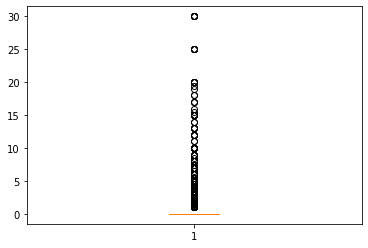

In [56]:
plt.boxplot(data['Price'])
plt.show()

b. Reviews column

i. Make suitable plot

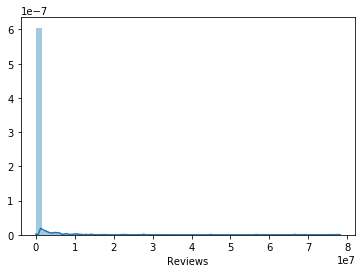

In [57]:
sns.distplot(data['Reviews'])
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [68]:
reviews_1m = data[data['Reviews'] > 1000000 ].index
data.drop(labels = reviews_1m, inplace=True)
print(reviews_1m.value_counts().sum(),'cols dropped')
#when inplace = true the target data based on the condition will be dropped permenantly

0 cols dropped


c. Installs

i. What is the 95th percentile of the installs?

In [69]:
percentile = data.Installs.quantile(0.95) #95th Percentile of Installs
print(percentile,"is the 95th percentile of Installs")

10000000.0 is the 95th percentile of Installs


ii.Drop records having a value more than the 95th percentile

In [70]:
for i in range(0,101,1):
    print(' The {} percentile of installs is {} '.format(i,np.percentile(data['Installs'],i)))
    #format returns the formatted string and {} acts as a place holder for the string

 The 0 percentile of installs is 5.0 
 The 1 percentile of installs is 50.0 
 The 2 percentile of installs is 100.0 
 The 3 percentile of installs is 100.0 
 The 4 percentile of installs is 100.0 
 The 5 percentile of installs is 100.0 
 The 6 percentile of installs is 500.0 
 The 7 percentile of installs is 500.0 
 The 8 percentile of installs is 1000.0 
 The 9 percentile of installs is 1000.0 
 The 10 percentile of installs is 1000.0 
 The 11 percentile of installs is 1000.0 
 The 12 percentile of installs is 1000.0 
 The 13 percentile of installs is 1000.0 
 The 14 percentile of installs is 1000.0 
 The 15 percentile of installs is 1000.0 
 The 16 percentile of installs is 5000.0 
 The 17 percentile of installs is 5000.0 
 The 18 percentile of installs is 5000.0 
 The 19 percentile of installs is 5000.0 
 The 20 percentile of installs is 5000.0 
 The 21 percentile of installs is 5699.999999999363 
 The 22 percentile of installs is 10000.0 
 The 23 percentile of installs is 10000.0 


In [73]:
col_drop = data[data["Installs"] > percentile].index
data.drop(labels = col_drop, inplace = True)
print(col_drop.value_counts().sum())#,'cols dropped')
#when inplace = true the target data based on the condition will be dropped permenantly

0


# Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?

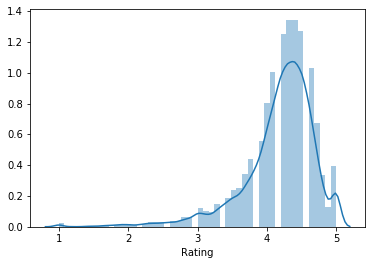

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [74]:
sns.distplot(data['Rating'])
plt.show()
print('The skewness of this distribution is',data['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(data.Rating.median(),data.Rating.mean()))

b. What is the implication of this on your analysis?

In [75]:
data['Rating'].mode()

0    4.3
dtype: float64

# 6. What are the top Content Rating values?

a. Are there any values with very few records?

In [76]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

b. If yes, drop those as they won’t help in the analysis

In [77]:
#Replacing unwanted values with NaN
NaN = []
for k in data['Content Rating']:
    NaN.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

data['Content Rating']=NaN

In [78]:
# Droping the NaN values.
drop_val= data[data["Content Rating"] == 'NaN'].index
data.drop(labels=drop_val, inplace=True)
print('droped cols',drop_val)
#when inplace = true the target data based on the condition will be dropped permenantly

droped cols Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [79]:
data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# Task 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

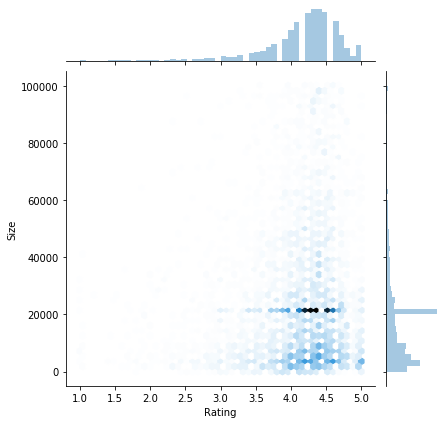

In [80]:
sns.jointplot(y ='Size', x ='Rating', data = data, kind ='hex')
plt.show()

b. Do you see any patterns?

c. How do you explain the pattern?

# Task 8. Effect of price on rating

a. Make a jointplot (with regression line)

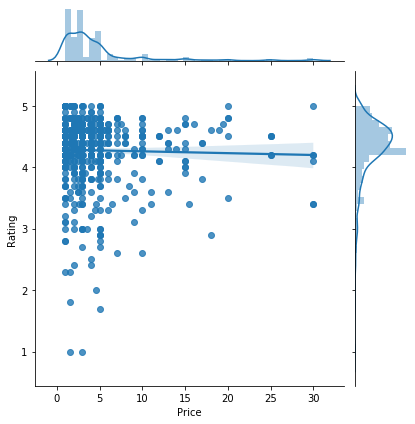

In [88]:
sns.jointplot(x='Price', y='Rating', data =data1, kind='reg')
plt.show()

b. What pattern do you see?





c. How do you explain the pattern?

In [89]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


d. Replot the data, this time with only records with price > 0

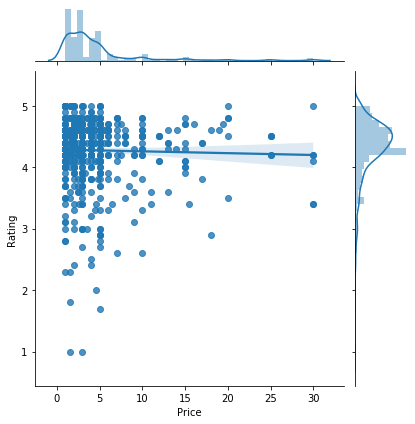

In [90]:
data1=data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=data1, kind='reg')
plt.show()

e. Does the pattern change?

In [92]:
data1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


f. What is your overall inference on the effect of price on the rating

# 9. Look at all the numeric interactions together 

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price

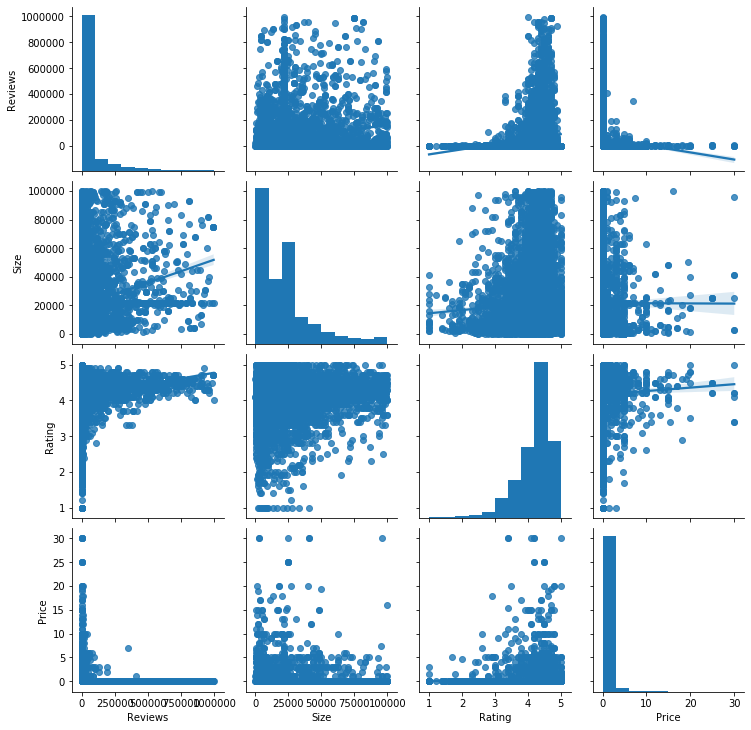

In [93]:
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# Task 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

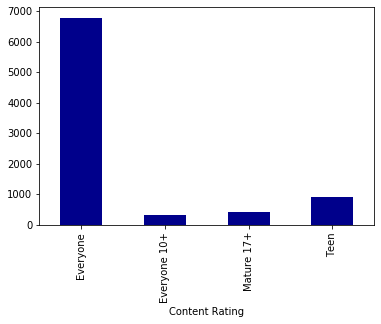

In [95]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkblue")
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

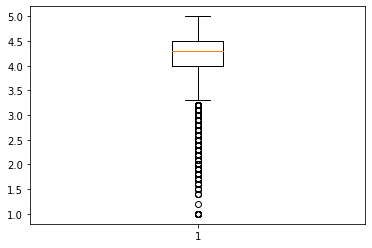

In [96]:
plt.boxplot(data['Rating'])
plt.show()

c. Choose the right metric and plot

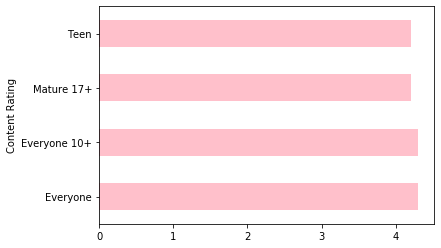

In [98]:
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="pink")
plt.show()

# Task 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

In [99]:
buckets=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], buckets, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [100]:
rating=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
rating

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


c. Make a heatmap of this

i. Annotated

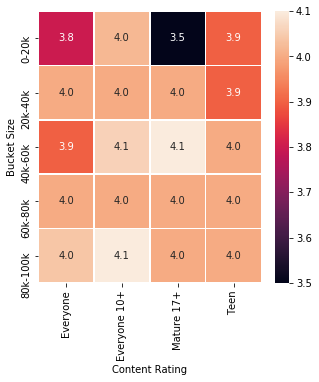

In [104]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(rating, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

ii.Greens color map

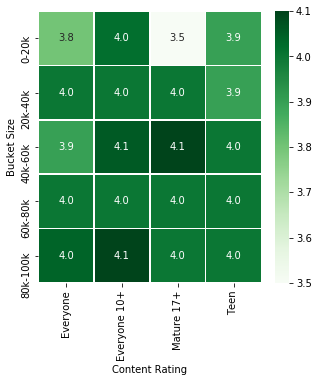

In [105]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(rating, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?